In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import LabelEncoder


In [70]:
df = pd.read_csv('https://raw.githubusercontent.com/GTerrence/dataset/main/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [71]:
df.dropna(inplace=True)
df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin', 'Fare'], axis=1, inplace=True)

In [94]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
1,1,1,0,38.0,1,0,0
3,1,1,0,35.0,1,0,2
6,0,1,1,54.0,0,0,2
10,1,3,0,4.0,1,1,2
11,1,1,0,58.0,0,0,2


In [29]:
# transform categorical data into numerical data    
le = LabelEncoder()


In [75]:
# transform categorical data into numerical data    
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Sex'] = le.fit_transform(df['Sex'])

In [87]:

#  Catatlah mapping untuk encoding (Sebelum dan setelah encoding)
for i in range(len(le.classes_)):
    mapping[i] = le.classes_[i]

In [88]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.672131,1.191257,0.519126,35.674426,0.464481,0.475410,1.278689
std,0.470725,0.515187,0.501005,15.643866,0.644159,0.754617,0.957294
min,0.000000,1.000000,0.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,36.000000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,1.000000,47.500000,1.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,3.000000,4.000000,2.000000


In [89]:
# suprevise learning
# split data into train and test   
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
# K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train ,y_train) #training model

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [91]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)


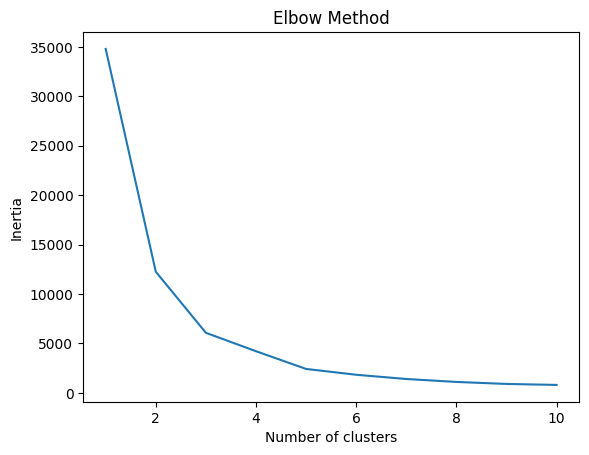

In [92]:
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


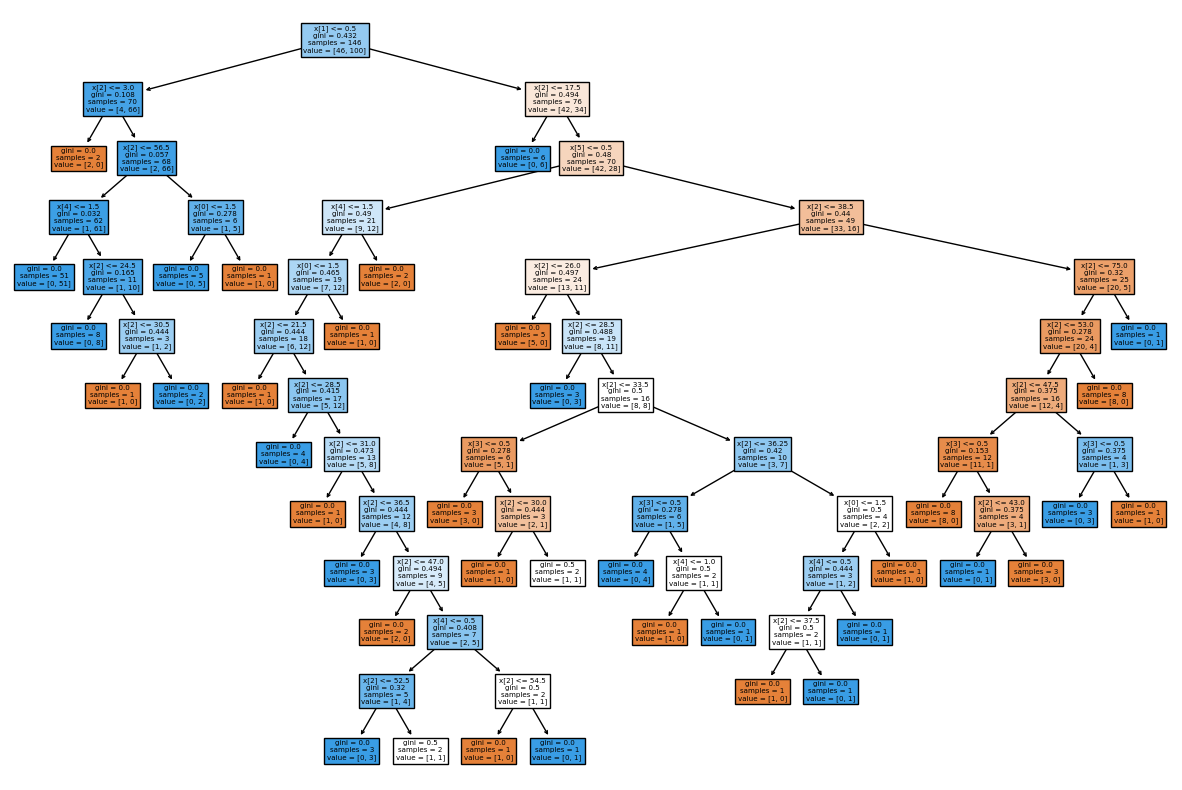

In [93]:

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

from sklearn import tree

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True)
plt.show()
